# Problem description

This notebook shows the algorithm running process to solves the [Smallest Number in Infinite Set](https://leetcode.com/problems/smallest-number-in-infinite-set/) problem.

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

In [1]:
import algviz

class SmallestInfiniteSet:
    def __init__(self):
        self.pp = None      # Pop pointer.
        self.v2l = dict()   # Value map list.
        self.viz = algviz.Visualizer()
        self.pp = algviz.DoublyLinkedListNode(0)
        self.li = self.viz.createGraph(self.pp, name='Doubly-linked list')
        self.log = self.viz.createLogger(5, name='Simulation log')
        self.res = self.viz.createVector(name='Results', cell_size=(25, 25))

    def popSmallest(self) -> int:
        res = self.pp.val + 1
        node = algviz.DoublyLinkedListNode(res, self.pp, self.pp.next)
        if self.pp.next != None:
            self.pp.next.prev = node
            self.pp.next = node
            self.v2l[res] = node
        else:
            self.pp.next = node
            self.v2l[res] = node
        self.log.write('New node:{}'.format(res))
        self.updatePopPointer()
        self.log.write("popSmallest -> {}".format(res))
        self.res.append(res)
        self.update_display()
        return res

    def update_display(self, delay=2.0):
        self.li.markNode(algviz.color_green, self.pp)
        self.viz.display(delay=delay)
        self.log.clear()
        
    def updatePopPointer(self):
        while self.pp != None and self.pp.next != None:
            if self.pp.val + 1 == self.pp.next.val:
                self.pp = self.pp.next
                self.li.markNode(algviz.color_green, self.pp)
                self.log.write('updatePopPointer:{}'.format(self.pp.val))
                self.update_display()
            else:
                break

    def addBack(self, num: int) -> None:
        self.log.write("addBack(num:{})".format(num))
        if num not in self.v2l:
            self.update_display()
            return
        node = self.v2l[num]
        self.li.markNode(algviz.color_blue, node)
        self.v2l.pop(num)
        if self.pp.val >= node.val:
            self.pp = node.prev
        if node.prev:
            node.prev.next = node.next
        if node.next:
            node.next.prev = node.prev
        self.log.write('Remove node:{}'.format(num))
        self.li.removeNode(node)
        self.res.append(None)
        self.update_display(3)

Doubly-linked list:

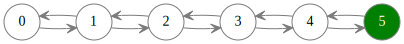

Simulation log:

Results:

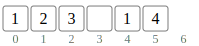

5

In [2]:
solver = SmallestInfiniteSet()
solver.addBack(2)
solver.popSmallest()
solver.popSmallest()
solver.popSmallest()
solver.addBack(1)
solver.popSmallest()
solver.popSmallest()
solver.popSmallest()

Doubly-linked list:

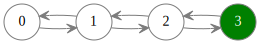

Simulation log:

Results:

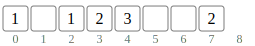

3

In [3]:
solver = SmallestInfiniteSet()
solver.popSmallest()
solver.addBack(1)
solver.popSmallest()
solver.popSmallest()
solver.popSmallest()
solver.addBack(2)
solver.addBack(3)
solver.popSmallest()
solver.popSmallest()